In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from collections import Counter
import nltk 
from nltk.corpus import stopwords

In [2]:
# Read the data and check for missing values and dupes:
df = pd.read_csv('linkedin_jobs.csv')
df=pd.DataFrame(df)
df.drop('Unnamed: 0',axis=1,inplace=True) 
print('Number of missing values:\n', df.isnull().sum())
print('Number of duplicates:',df.duplicated().sum())
len(df)
 

Number of missing values:
 job_title           0
company_name        0
location            0
workplace_type    310
job_posted          0
job_desc            0
dtype: int64
Number of duplicates: 10


707

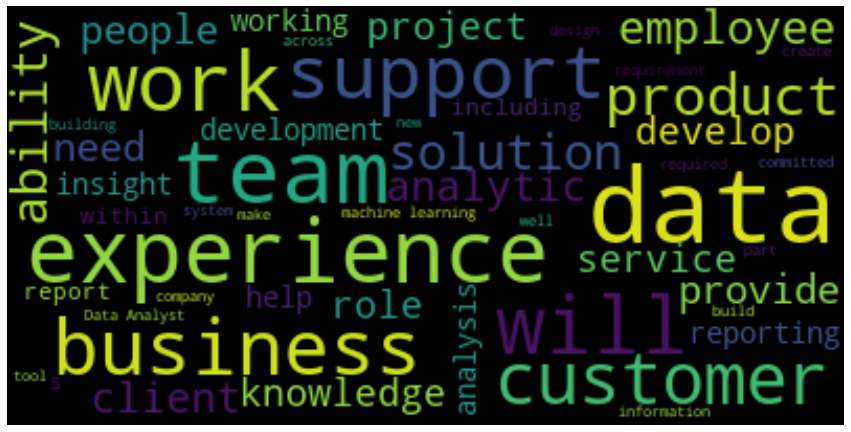

In [3]:
# Stopwords:
text = df.job_desc.values
stopwords=set(STOPWORDS)
stopwords.update(['data', 'team', 'solution', 'experience', 'service', 'develop', 'product'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=50, max_words=50).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

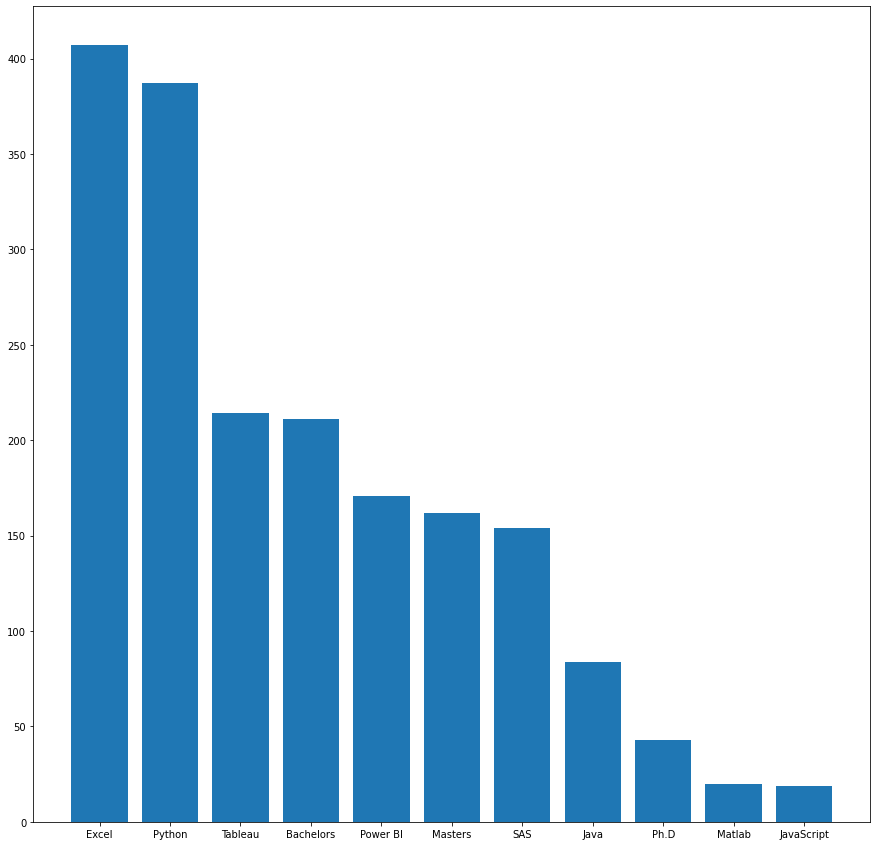

In [4]:
# Get count of instances of keywords:
keylist=['Power BI', 'PowerBI', 'Tableau', 'Python', 'Excel', 'Matlab', 'SAS', 'Java', 'JavaScript', "Masters", 
"Bachelors", "Master", "Bachelor", "PhD", "Ph.D"]
dict={}

for keyword in range(0,len(keylist)):
    count=df[['job_desc']].apply(lambda row: row.astype(str).str.contains(keylist[keyword], case=False).any(), axis=1).sum()
    dict[keylist[keyword]]=count

# Sum counts of permutation of words:
pbi = dict.get('Power BI')+dict.get('PowerBI')
dict.update({'Power BI':pbi})
dict.pop('PowerBI', None)

bac = dict.get('Bachelors')+dict.get('Bachelor')
dict.update({'Bachelors':bac})
dict.pop('Bachelor', None)

mas = dict.get('Masters')+dict.get('Master')
dict.update({'Masters':mas})
dict.pop('Master', None)

phd = dict.get('Ph.D')+dict.get('PhD')
dict.update({'Ph.D':phd})
dict.pop('PhD', None)

# Sort dictionary:
sort = sorted(dict.items(),key=lambda item:item[1], reverse=True)
dictsort = {k: v for k, v in sort}

# Plot:
keys = (dictsort.keys())
values = (dictsort.values())
plt.bar(keys, values)
plt.show()  
